
### Identificando el problema

Los tasadores asignan valores a las propiedades de acuerdo a criterios subjetivos  y muchas veces se encuentran con que no saben diferenciar los valores segun el tipo de propiedad o con problemas para asignar el valor de venta de una propiedad. Por lo que los ayudaremos creando un modelo de ML que prediga el precio de venta de los inmuebles.

Para el caso de que el Equipo de Datos al cual recientemente te incorporaste no tenga nada armado debemos comenzar preguntandonos ¿que determina el valor de un inmueble? ¿Trabajaremos con datos locales o globales?


Personalmente si bien creo que hay ciertos datos que estan ligados a la cotizacion de un inmueble, antes de empezar a trabajar con datos tendria una reunion/es con los profesionales, en este caso tasadores, para ver que atributos ellos consideran que son mas relevantes a la hora de tasar una propiedad, quizas uno mencione algunos atributos que otro se olvide. 
Por otra parte, el analisis en cuestion va a desarrollarse de forma local, tomando a Buenos Aires. Para el caso de que se quiera expandir el modelo globalmente no habria problemas y solo deberiamos ajustar algunas variables en nuestro modelo.


¿Qué datos crees que te ayudarían a trabajar en el problema? Primero haria una lista ordenada sobre los atributos que creo influyen en la tasacion,ej:

- Pais
- Provincia
- Barrio
- Espacio de la propiedad (cuartos, jardin, baños, garage, etc)
- Impuestos
- Servicios asociados
- Proximidad a ciertos lugares (teatros, restaurantes, almacenes, ciudad, etc)
- Nivel promedio de ruido
- Niveles de aire/luz/contaminacion

¿Por qué se eligen estos parametros? El analisis subjetivo de los tasadores puede estar sesgado, por lo que como DS debemos buscar  patrones sobre datos objetivos para respaldar el analisis dado. Ademas, tambien se puede mencionar algunas caracteristicas propias del inmueble que pueden ayudar para concretar la venta. 



### Explorando los datos 

Para comenzar usaremos los datos de la empresa (https://www.properati.com.ar/data/).  para el caso de que no estes familiarizado con la zona geografica del proyecto en cuestion, puede ayudar primero buscar en (https://es.wikipedia.org/wiki/Gran_Buenos_Aires)

0. Importamos las librerias necesarias para trabajar con nuestro modelo

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set()

1. Cargamos el dataset usando las funcionalidades de Pandas e imprimimos cuantas filas y columnas tiene el dataset para saber el tamaño

In [90]:
df = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv",sep=',') #carga del dataset junto con sus cinco primeras instancias
datapd = pd.DataFrame(df)
dataf = df.insert(2, "Count", 1, True)
datapd

,start_date,end_date,Count,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,1,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,1,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,1,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,1,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,1,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,1,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,1,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,1,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,1,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


In [91]:
datapd.shape #Cantidad de Filas x Columnas

(146660, 20)

2. Visualizamos los atributos de nuestro dataset (columnas) y vemos si hay algunos valores faltantes

In [92]:
datapd.dtypes #nombre de las columnas con sus tipos de datos

start_date          object
end_date            object
Count                int64
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

In [93]:
datapd.count() #Cantidad de registros por atributo

start_date         146660
end_date           146660
Count              146660
created_on         146660
lat                136735
lon                136701
l1                 146660
l2                 146660
l3                 146660
rooms              146660
bedrooms           146660
bathrooms          140703
surface_total      126133
surface_covered    125046
price              146660
currency           146660
title              146660
description        146660
property_type      146660
operation_type     146660
dtype: int64

In [94]:
faltantes = datapd.count() - 146660 #como hay 146660 registros, lo que hacemos es calcular la cantidad de registros totales - la cantidad de registros en cada columna
print(faltantes) #valores faltantes por columna

start_date             0
end_date               0
Count                  0
created_on             0
lat                -9925
lon                -9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms          -5957
surface_total     -20527
surface_covered   -21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


Ahora bien, ya tenemos una minima idea del tamaño del dataset local con el que trabajamos. Veamos los tipos de propiedades que hay en él. 

In [11]:
print('Hay 10 tipos de propiedad', 'e Instancias')
pd.value_counts(datapd['property_type']) #tipos de propiedad en el dataset

Hay 10 tipos de propiedad e Instancias


Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='property_type'>

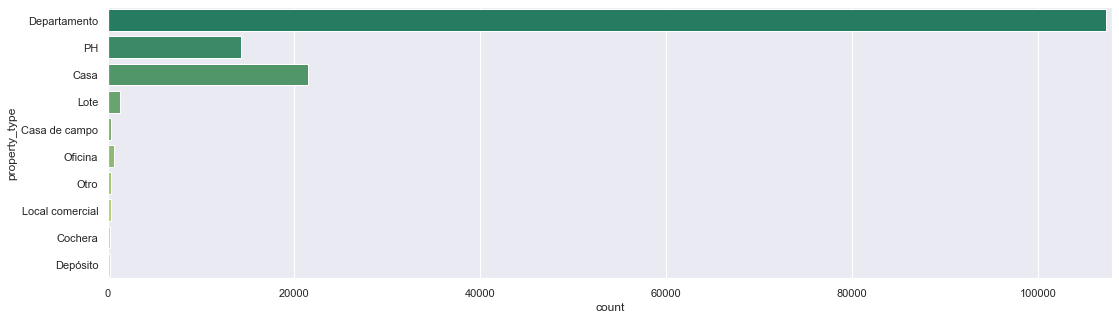

In [12]:
plt.figure(figsize=(18,5))
plt.xlim(0,108000)
sns.countplot(data = datapd, y = "property_type", palette="summer") #Comparativa entre las cantidades de propiedades segun su tipo

A simple vista por lo graficado vemos que el tipo de propiedad "Departamento" es el que mayor ponderacion tiene en los datos.

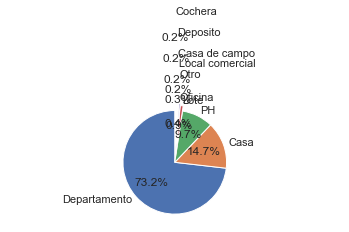

In [153]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Departamento', 'Casa', 'PH', 'Lote', 'Oficina', 'Otro', 'Local comercial', 'Casa de campo', 'Deposito', 'Cochera'

sizes = [107326, 21521, 14298, 1312, 658, 374, 325, 322, 265, 259]
explode = (0,0,0,0.5, 0.7, 3, 4, 5, 7, 9) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', radius = 5, startangle=90, )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

En el dataset que tenemos el 73,2% corresponde a Departamentos, seguido por 14,7% Casas y 9,7% PHs. Por lo que el 97,6% de nuestro dataset esta cubierto por estos tres tipos de propiedades.

Para el caso de que no conozcas lo que es un PH (Propiedad Horizontal), este tipo de construccion se dio en Argentina cuando la poblacion empezo a crecer significativamente por la inmigracion italiana. Dividiendo las manzanas/cuadras/bloques de origen colonial a parcelas. Un PH es un terreno estrecho y alargado en los que hay habitaciones del mismo tamaño y un patio que las conecta. A este tipo de propiedad se le suele llamar tambien "casa chorizo".

Sabemos los tipos de propiedades del dataset y su ponderacion, pero... ¿Cómo se distribuyen geograficamente?

Para esto usamos Matplotlib y vemos graficamente donde hay mas inmuebles segun la zona. Tambien usaremos shapes para elegir el tipo de propiedad en caso de que queramos.

In [11]:
#SHAPES

#ZONA: CAPITAL FEDERAL
dcaba = df[df.property_type.isin(['Departamento', 'Casa' , 'PH', 'Lote', 'Oficina', 'Otro','Local comercial', 'Casa de campo', 'Depósito', 'Cochera']) & df.l2.isin(['Capital Federal'])]
dcaba.shape

#ZONA: NORTE
dnorte = df[df.property_type.isin(['Departamento', 'Casa' , 'PH', 'Lote', 'Oficina', 'Otro','Local comercial', 'Casa de campo', 'Depósito', 'Cochera']) & df.l2.isin(['Bs.As. G.B.A. Zona Norte'])]
dnorte.shape

#ZONA: SUR
dsur = df[df.property_type.isin(['Departamento', 'Casa' , 'PH', 'Lote', 'Oficina', 'Otro','Local comercial', 'Casa de campo', 'Depósito', 'Cochera']) & df.l2.isin(['Bs.As. G.B.A. Zona Sur'])]
dsur.shape

#ZONA: OESTE
doeste = df[df.property_type.isin(['Departamento', 'Casa' , 'PH', 'Lote', 'Oficina', 'Otro','Local comercial', 'Casa de campo', 'Depósito', 'Cochera']) & df.l2.isin(['Bs.As. G.B.A. Zona Oeste'])]
doeste.shape

(12666, 20)

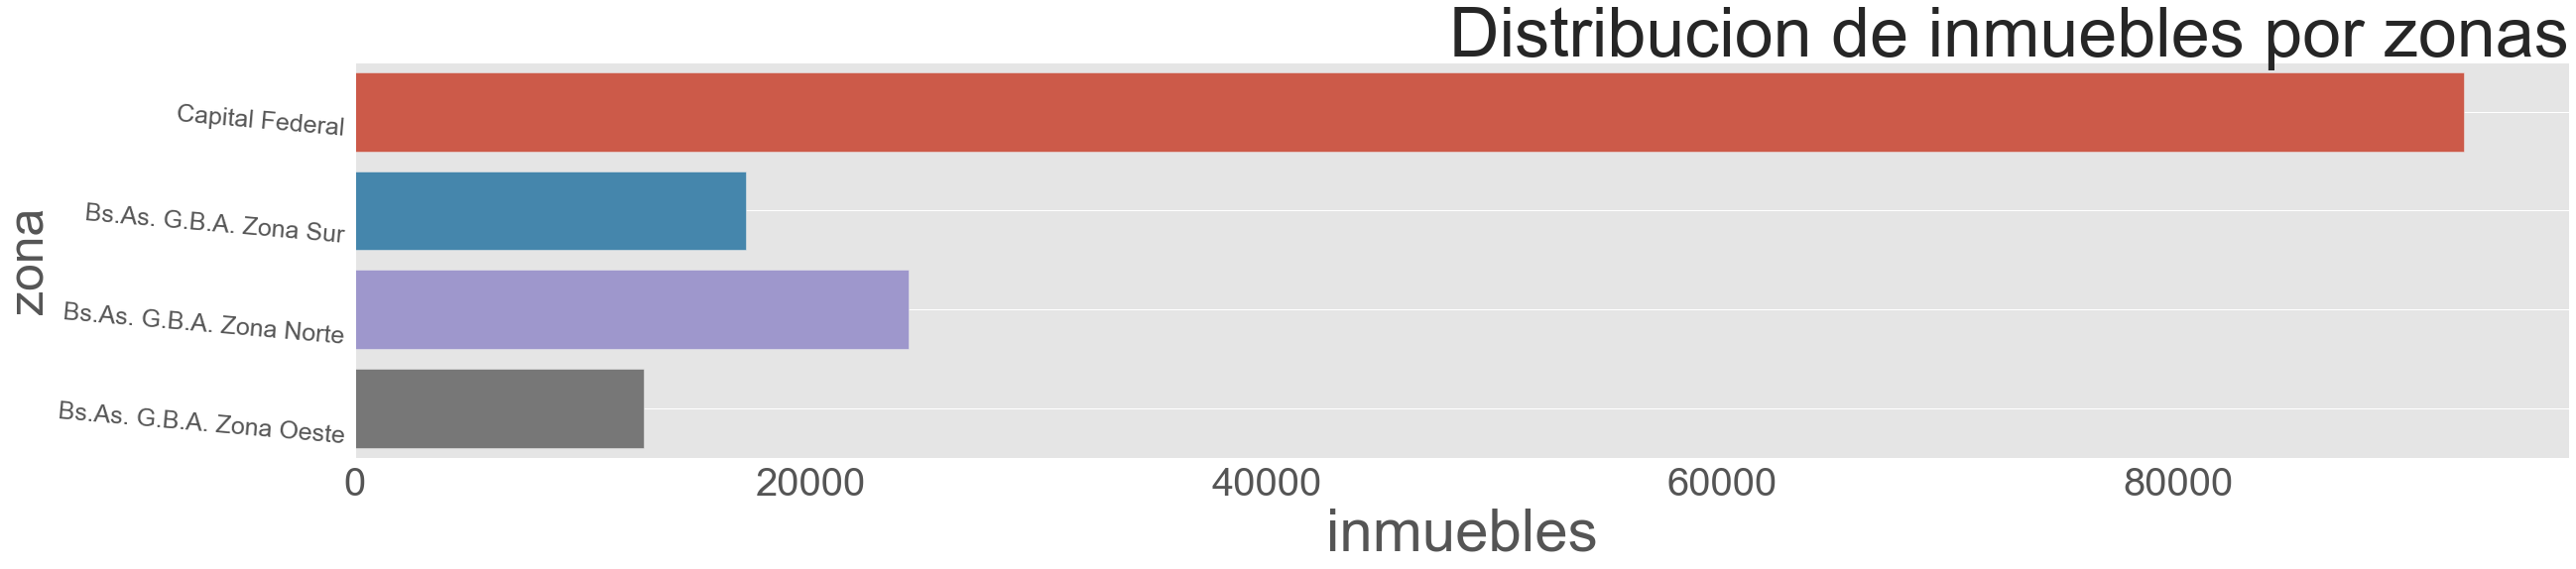

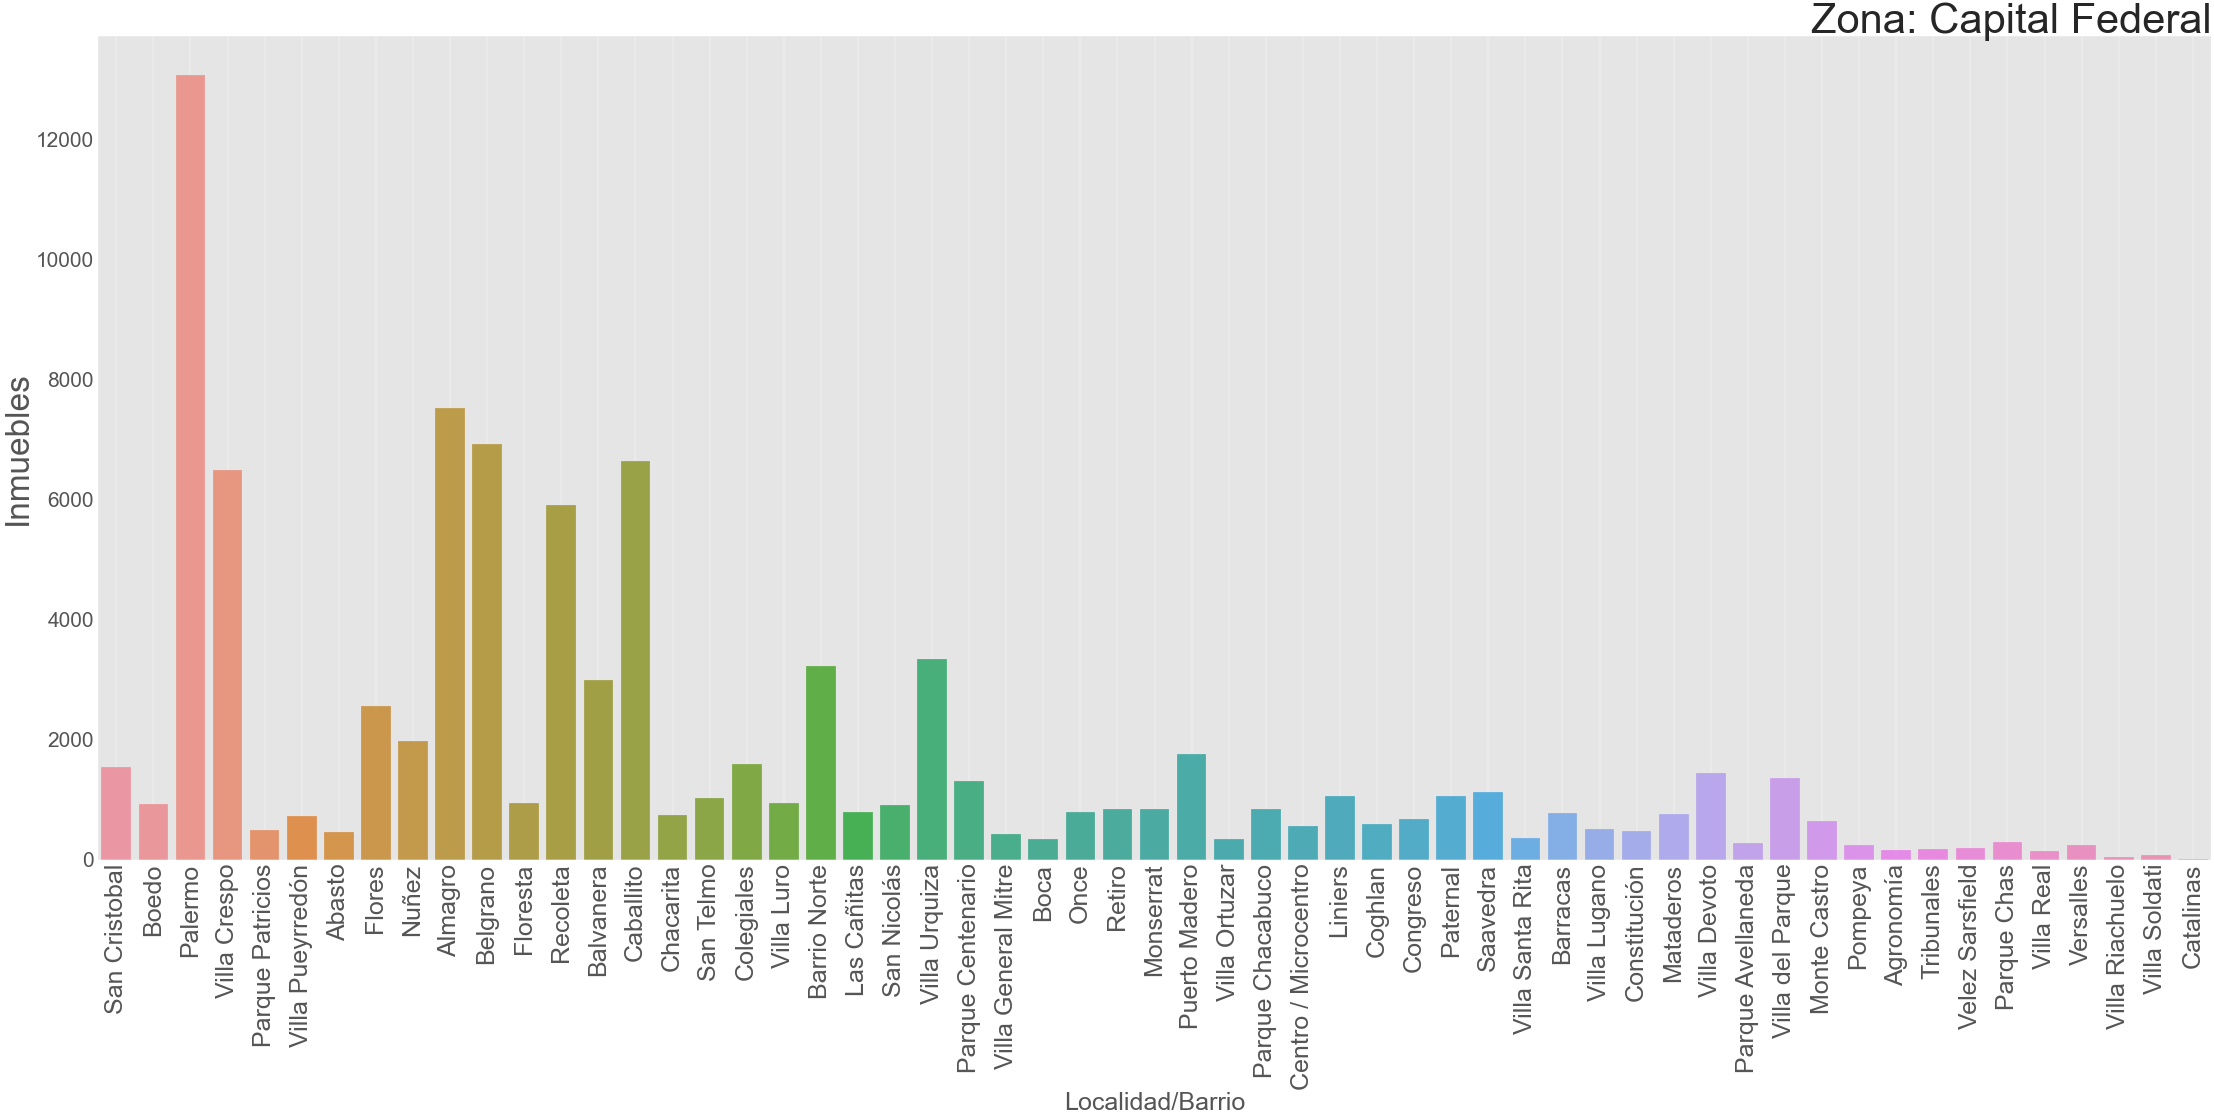

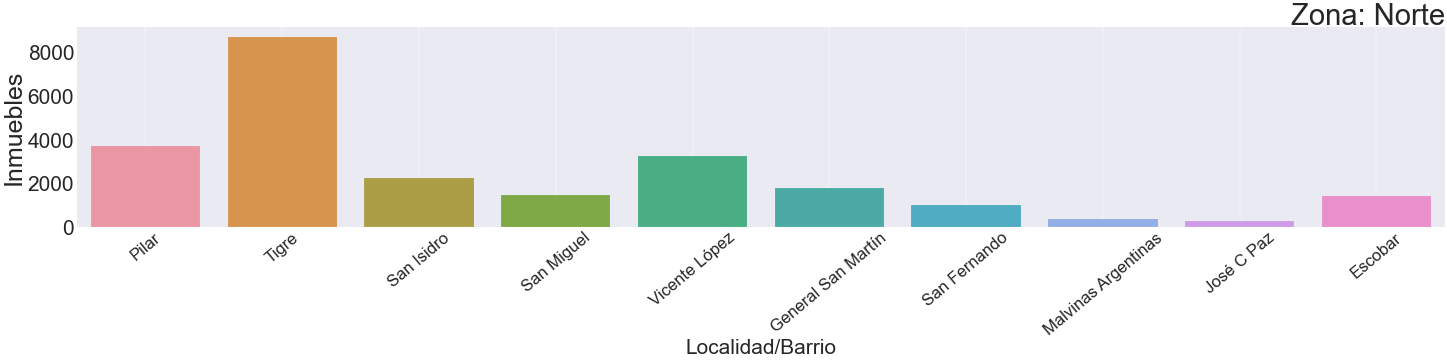

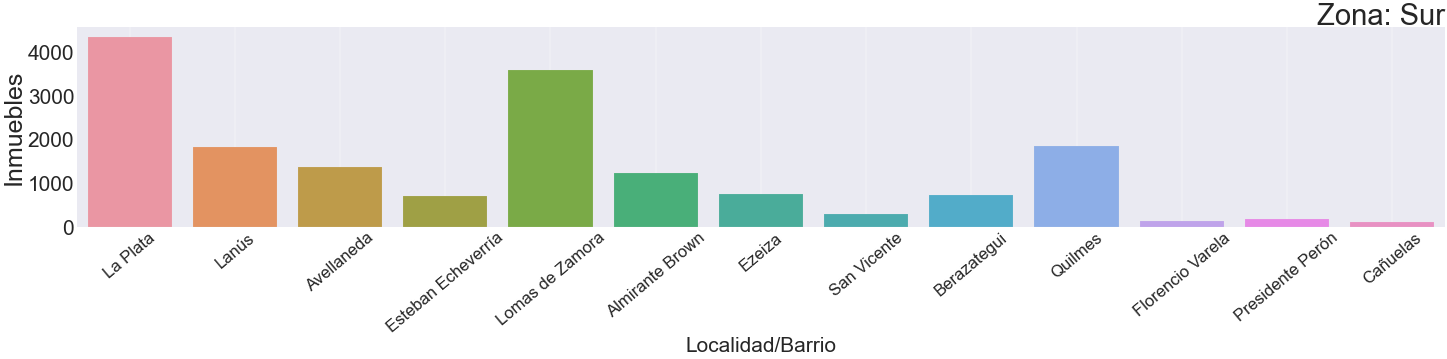

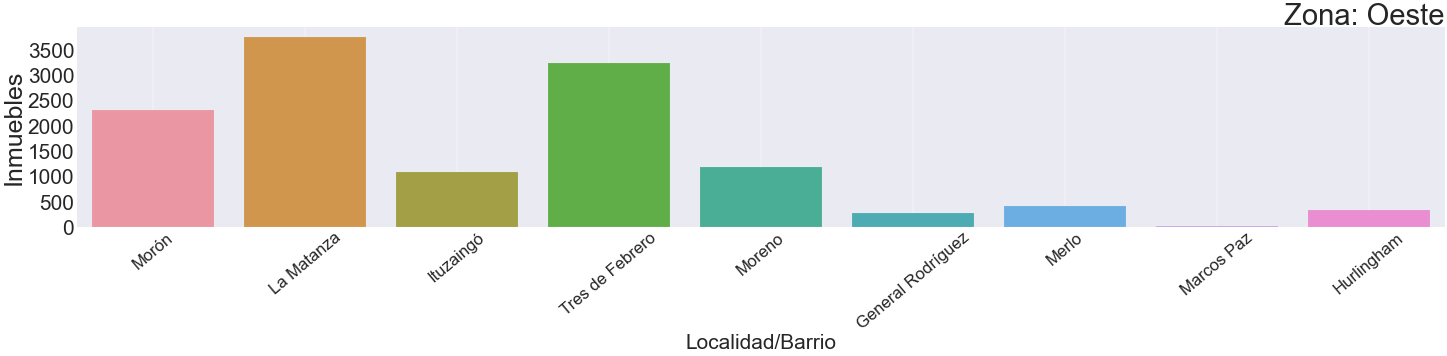

In [12]:
#ZONAS: TODAS

plt.figure(figsize=(40,25))
plt.style.use('ggplot')
plt.subplot(3,1,1)
sns.countplot(data = datapd, y = 'l2')
plt.xlabel('inmuebles', fontsize = 60)
plt.xticks(fontsize = 40)
plt.ylabel('zona', fontsize = 50)
plt.yticks(rotation = -5, size = 25)
plt.title('Distribucion de inmuebles por zonas',fontsize = 70, loc='right')
plt.grid()
plt.show()

#ZONA: CAPITAL FEDERAL
plt.figure(figsize=(200,80), dpi = 30)
plt.style.use('fast')
plt.subplot(2,2,1)
sns.countplot(data = dcaba, x = 'l3')
xlim=(0,100)
plt.ylabel('Inmuebles', fontsize = 80)
plt.yticks(fontsize = 50)
plt.xlabel('Localidad/Barrio', fontsize = 60)
plt.xticks(rotation = 90, fontsize = 60)
plt.title('Zona: Capital Federal',fontsize = 100, loc='right')
plt.grid()
plt.show() #ver como agrandar la x y como hacer un grafico mejor

#ZONA: NORTE
plt.figure(figsize=(200,30), dpi = 30)
plt.style.use('seaborn')
plt.subplot(3,3,1)
sns.countplot(data = dnorte, x = 'l3')
xlim=(0,100)
plt.ylabel('Inmuebles', fontsize = 60)
plt.yticks(fontsize = 50)
plt.xlabel('Localidad/Barrio', fontsize = 50)
plt.xticks(rotation = 40, fontsize = 40)
plt.title('Zona: Norte',fontsize = 70, loc='right')
plt.grid()
plt.show() #ver como agrandar la x y como hacer un grafico mejor

#ZONA: SUR
plt.figure(figsize=(200,30), dpi = 30)
plt.style.use('seaborn')
plt.subplot(3,3,2)
sns.countplot(data = dsur, x = 'l3')
xlim=(0,100)
plt.ylabel('Inmuebles', fontsize = 60)
plt.yticks(fontsize = 50)
plt.xlabel('Localidad/Barrio', fontsize = 50)
plt.xticks(rotation = 40, fontsize = 40)
plt.title('Zona: Sur',fontsize = 70, loc='right')
plt.grid()
plt.show() #ver como agrandar la x y como hacer un grafico mejor

#ZONA: OESTE
plt.figure(figsize=(200,30), dpi = 30)
plt.subplot(3,3,3)
sns.countplot(data = doeste, x = 'l3')
xlim=(0,100)
plt.ylabel('Inmuebles', fontsize = 60)
plt.yticks(fontsize = 50)
plt.xlabel('Localidad/Barrio', fontsize = 50)
plt.xticks(rotation = 40, fontsize = 40)
plt.title('Zona: Oeste',fontsize = 70, loc='right')
plt.grid()
plt.show() #ver como agrandar la x y como hacer un grafico mejor

Vemos que los tipo de Propiedad Departamento, Casa y PH son los tipos mas relevantes. Tambien vimos que en Capital Federal hay mayor cantidad de inmuebles publicados en nuestro dataset con respecto a otras zonas de BA.

In [62]:
#ZONA: CAPITAL FEDERAL
ds = df[df.property_type.isin(['Departamento', 'Casa' , 'PH']) & df.l2.isin(['Capital Federal'])]
ds.shape #como agregamos una columna nueva "Count" hay 20 columnas

(91485, 20)

Vamos a ver si hay valores dentro de esta seleccion de Capital Federal que sean raros.

Text(0.5, 1.0, 'Superficie total por tipo de propiedad')

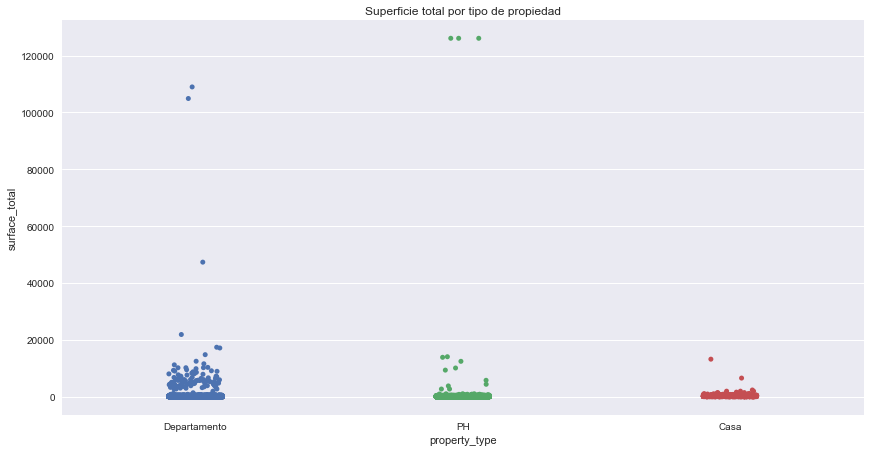

In [14]:
sns.set_style('darkgrid')
sns.catplot(x='property_type', y='surface_total', data=ds, height=6, aspect=2)
plt.title('Superficie total por tipo de propiedad')
#lim.set(ylim=(0, 100000))

Vemos que las Casas estan dentro de un parametro normal, pero que PH y Departamento tienen valores inusuales. Por ejemplo hay superficies totales que se alejan bastante de los valores tipicos. Un departamento con mas de 100.000 ya nos hace sospechar.

Text(0.5, 1.0, 'Dormitorios por tipo de propiedad')

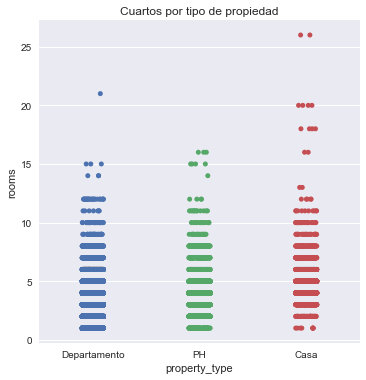

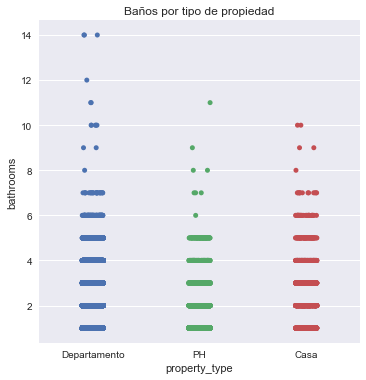

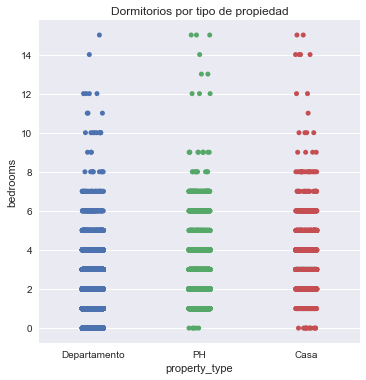

In [69]:
sns.catplot(x='property_type', y='rooms', data=ds)
plt.title('Cuartos por tipo de propiedad')
sns.catplot(x='property_type', y='bathrooms', data=ds)
plt.title('Baños por tipo de propiedad')
sns.catplot(x='property_type', y='bedrooms', data=ds)
plt.title('Dormitorios por tipo de propiedad')

Para este caso vemos Casas con mas de 15 cuartos. Quizas puede darse en un PH al ser una propiedad horizontal, mientras esta sea grande. ¿Pero una casa o departamento?

Vemos que las Casas estan dentro de un parametro normal, pero que PH y Departamento tienen valores inusuales. Por ejemplo hay valores en Departamentos que superan los 40.000 y luego hay otros aun mas inusuales que oscilan entre 100.000 u 120.000. Tambien hay valores de PHs mayores a 120.000. 

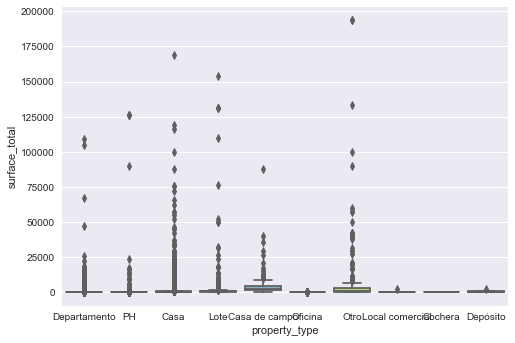

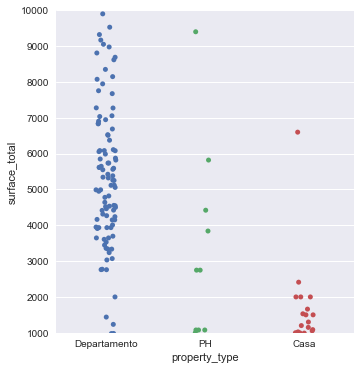

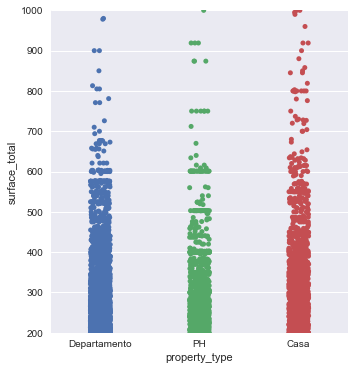

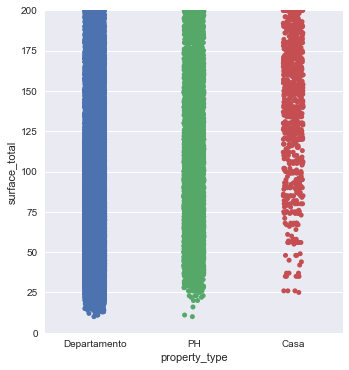

In [18]:
ax = sns.boxplot(x="property_type", y="surface_total", data=datapd, palette="Set3")
lim = sns.catplot(x="property_type", y="surface_total", data=ds)
lim.set(ylim=(1000, 10000))
lim = sns.catplot(x="property_type", y="surface_total", data=ds)
lim.set(ylim=(200, 1000))
lim = sns.catplot(x="property_type", y="surface_total", data=ds)
lim.set(ylim=(0, 200))

Vamos a buscar el promedio de la superficie total segun el tipo de propiedad.

Analizar los precios y por que hay valores inusuales

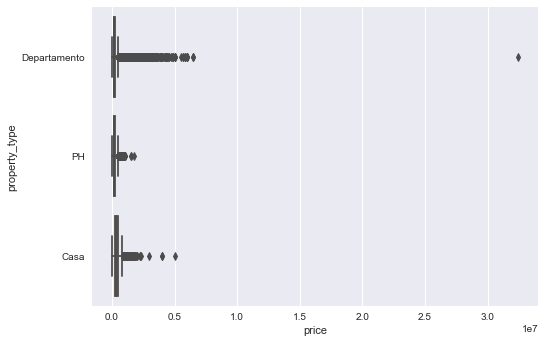

In [19]:
ax = sns.boxplot(y="property_type", x="price", data=ds)

Cuestiones a ver:

- ¿por que la superficie total muestra valores superiores a 100.000? en que unidad esta?
- Armonizar la paleta de colores de todo el trabajo segun un criterio definido. Ej: style = gradiente blue
- ¿Como ver en seaborn con forma de cuadrilla?
- Sacar indices del tipo de propiedad vs baños promedios, rooms promedios, precio promedio, etc


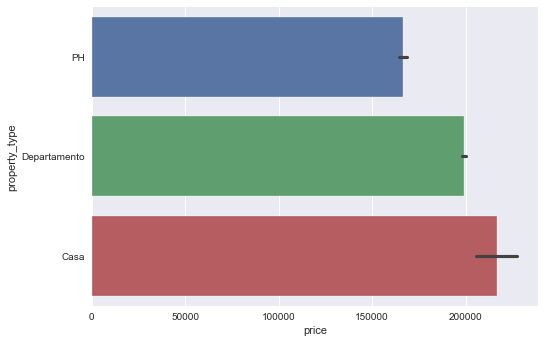

In [64]:
ar = sns.barplot(y="property_type", x="price", data=dfil)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

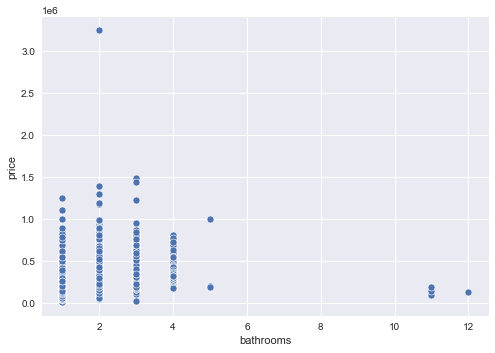

In [30]:
sns.scatterplot(x = 'bathrooms', y = 'price', data =dfi)

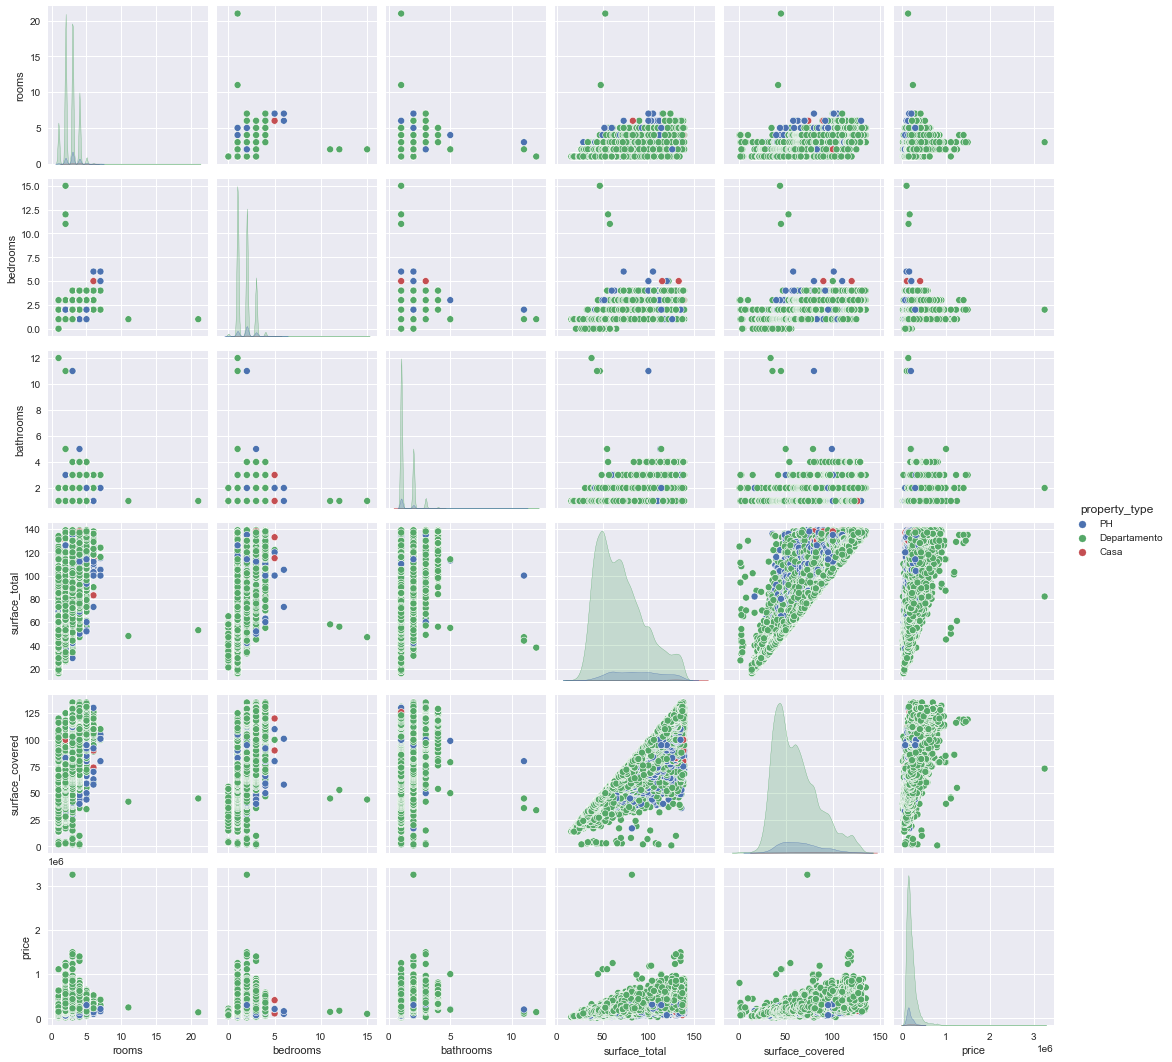

In [63]:
sns.pairplot(data = dfil, hue = 'property_type')
sns.color_palette("crest", as_cmap=True)

In [24]:
dfil.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.922351,0.474078,0.742788,0.787543,0.464379
bedrooms,0.922351,1.000000,0.480821,0.724529,0.777574,0.445756
bathrooms,0.474078,0.480821,1.000000,0.564808,0.613395,0.575130
surface_total,0.742788,0.724529,0.564808,1.000000,0.919732,0.665742
surface_covered,0.787543,0.777574,0.613395,0.919732,1.000000,0.700715
price,0.464379,0.445756,0.575130,0.665742,0.700715,1.000000


<AxesSubplot:title={'center':'Correlación PH'}>

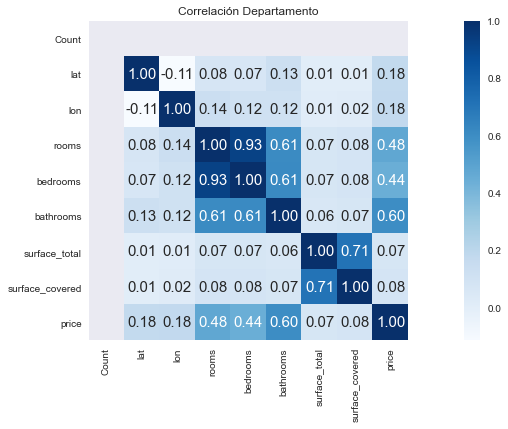

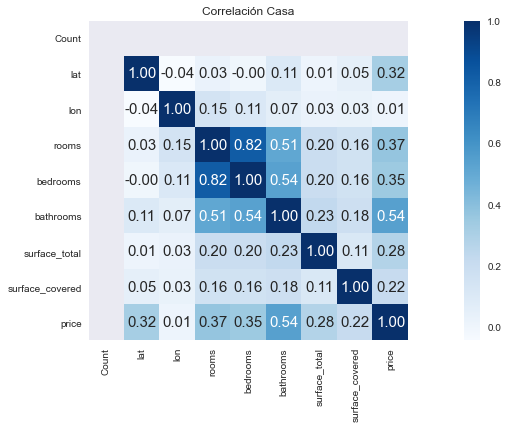

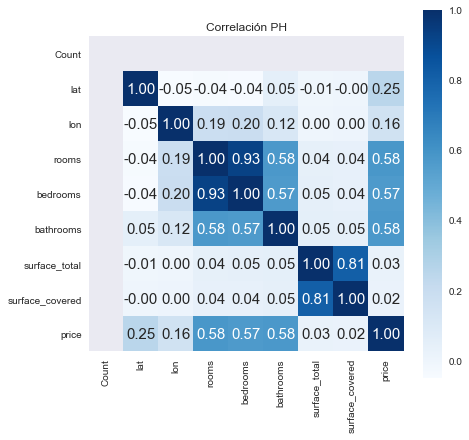

In [61]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
plt.title("Correlación Departamento")
sns.heatmap(ds[ds.property_type== 'Departamento'].corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'Blues')

plt.figure(figsize=(20,20))
plt.subplot(3,1,2)
plt.title("Correlación Casa")
sns.heatmap(ds[ds.property_type== 'Casa'].corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'Blues')

plt.figure(figsize=(24,23))
plt.subplot(3,3,3)
plt.title("Correlación PH")
sns.heatmap(ds[ds.property_type== 'PH'].corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'Blues')

In [81]:
dfilt = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv",sep=',')
dfi = dfilt.loc[dfilt["property_type"].isin(["Casa", "PH", "Departamento"])&(dfilt["l2"].isin(["Capital Federal"]))&(dfilt["surface_total"]>=15)&(dfilt["surface_total"]<=140)&(dfilt["price"]<4000000)&(dfilt["rooms"]>=0)&(dfilt["bedrooms"]>=0)&(dfilt["bathrooms"]>=0)&(dfilt["surface_total"]>dfilt["surface_covered"])]
#dfil = dfi.iloc[[0,1,2,3,4,5],[8,9,10,11,12,13]]
dfil = dfi.drop(columns=['start_date','end_date','created_on','lon','lat','l1','l2','currency','title','description','operation_type'])

In [82]:
#dfil.dropna(inplace=True)
#dfil.shape()
dfil

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
8,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,PH
9,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,PH
10,Villa Pueyrredón,2.0,1.0,2.0,66.0,49.0,170000.0,PH
...,...,...,...,...,...,...,...,...
146545,Palermo,3.0,2.0,2.0,88.0,82.0,399000.0,Departamento
146546,Palermo,3.0,2.0,2.0,89.0,82.0,434999.0,Departamento
146550,Palermo,5.0,2.0,2.0,114.0,95.0,298000.0,PH
146551,Palermo,4.0,3.0,2.0,103.0,98.0,660000.0,Departamento


In [9]:
#ZONA: CAPITAL FEDERAL
baseML0 = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv",sep=',') #carga del dataset junto con sus cinco primeras instancias
baseML1 = baseML0[baseML0.property_type.isin(['Departamento', 'Casa' , 'PH']) & baseML0.l2.isin(['Capital Federal'])]
baseML1
baseML2 = baseML1[(baseML1.surface_total >=15) & (baseML1.surface_total <=1000)]
baseML2
baseML3 = baseML2[baseML2.price <= 4000000]
baseML3
columns = ['rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price']
baseML4 = baseML3[columns]
baseML4
baseML5 = baseML4.dropna()
baseML5

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0
...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0
146555,3.0,2.0,2.0,144.0,134.0,480000.0
146556,4.0,2.0,2.0,317.0,143.0,530000.0
146557,3.0,2.0,2.0,145.0,145.0,420000.0


In [41]:
baseML0 = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv",sep=',') #cargar datasaet
columns = ['rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price'] #definir atributos/columnas necesarias
baseML1 = baseML0[baseML0.property_type.isin(['Departamento', 'Casa' , 'PH']) & baseML0.l2.isin(['Capital Federal']) & (baseML0.surface_total >=15) & (baseML0.surface_total <=1000) & (baseML0.price <= 4000000)]
#aplicar filtror requeridos

baseML1[columns].dropna()  #invocar la base con los filtros requeridos y que elimite nulls


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0
...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0
146555,3.0,2.0,2.0,144.0,134.0,480000.0
146556,4.0,2.0,2.0,317.0,143.0,530000.0
146557,3.0,2.0,2.0,145.0,145.0,420000.0
